In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
from models import create_model 
import pandas as pd

import yaml
import torch
from pipeline.walkforward import WFCVGenerator
from utils.paths import CONFIG_DIR, VOL_EXPERIMENTS_DIR, DATA_DIR, PRICE_EXPERIMENTS_DIR

from config.config_types import AppConfig


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import json


In [20]:

fold_num = 0
name = "exp_001_mlp_40_sliding"
name = "exp_010_cnn_40_sliding"
name = "exp_006_cnn_40"
name = "exp_012_cnn_40"
name = "exp_011_mlp_40"
name = "exp_013_mlp_504"
name = "exp_011_mlp_40"

name  = "exp_011_mlp_40"
trial = "trial_20251029_182517" 

# -------- load config --------
base = f"{PRICE_EXPERIMENTS_DIR}/{name}/{trial}/"
conifg_path = f"{base}config_snapshot.json"

with open(conifg_path, 'r') as f:
    cfg = json.load(f)

cfg = cfg["cfg"]

cfg = AppConfig.from_dict(cfg)

if cfg.data["df_master"] is not None:
    df_master_path =  cfg.data["df_master"]
    df_master = pd.read_parquet(f"{DATA_DIR}/{df_master_path}")
    #print(f"provided df master: {df_master_path}\n{df_master.head()}")
else:
    df_master = None

wf = WFCVGenerator(config=cfg.walkforward)


In [21]:
results = pd.read_csv(f"{base}/results.csv")
results


,trial,fold,tr_loss,val_loss,test_loss,tr_mae,val_mae,test_mae,tr_directional_accuracy_pct,val_directional_accuracy_pct,test_directional_accuracy_pct,seconds,model_path
0,0,0,0.483451,0.448108,0.304370,0.505612,0.450407,0.372134,65.205282,49.492636,50.723433,43.270017,/orcd/home/002/corte911/code/finNN_code/src/pr...
1,0,1,0.449620,0.407761,0.389200,0.480029,0.434849,0.410429,66.998273,50.394601,49.939483,29.034094,/orcd/home/002/corte911/code/finNN_code/src/pr...
2,0,2,0.445073,0.527536,0.495255,0.470342,0.478207,0.475941,67.245781,50.522733,49.916729,28.896710,/orcd/home/002/corte911/code/finNN_code/src/pr...
3,0,3,0.549477,0.980521,1.442760,0.534398,0.671516,0.822546,66.093689,50.708282,50.010073,28.619046,/orcd/home/002/corte911/code/finNN_code/src/pr...
4,0,4,0.593079,1.727470,10.524972,0.557479,0.899558,2.025925,63.379657,49.352133,49.697661,28.784310,/orcd/home/002/corte911/code/finNN_code/src/pr...
5,0,5,0.534502,9.687221,4.830068,0.528210,1.950360,1.426074,65.580642,50.349295,50.434011,28.651685,/orcd/home/002/corte911/code/finNN_code/src/pr...
6,0,6,0.350798,1.590996,0.518667,0.405073,0.805093,0.502885,66.529781,50.863725,50.834322,28.504691,/orcd/home/002/corte911/code/finNN_code/src/pr...
7,0,7,0.323082,0.365623,0.546523,0.392404,0.424714,0.516146,71.439260,50.701064,50.318664,29.237700,/orcd/home/002/corte911/code/finNN_code/src/pr...
8,0,8,0.298829,0.584524,0.274790,0.375982,0.526127,0.356022,72.452199,49.533674,49.760732,28.586992,/orcd/home/002/corte911/code/finNN_code/src/pr...
9,0,9,0.307682,0.562028,0.408165,0.394303,0.510659,0.446325,74.189430,50.024784,50.074786,28.897929,/orcd/home/002/corte911/code/finNN_code/src/pr...


In [22]:
results.drop(columns="model_path").mean().apply(lambda x: round(x, 5))

trial                             0.00000
fold                             10.00000
tr_loss                           0.41611
val_loss                          1.62026
test_loss                         1.77540
tr_mae                            0.45908
val_mae                           0.75522
test_mae                          0.77078
tr_directional_accuracy_pct      69.46012
val_directional_accuracy_pct     50.11308
test_directional_accuracy_pct    50.19531
seconds                          30.04257
dtype: float64

In [23]:

test_data = {}
data = {}
for i, fold_data in enumerate(wf.folds()):
    X_test = fold_data[4]
    y_test = fold_data[5]

    test_data[i] = [X_test, y_test]
    data[i] = fold_data
    print(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
x

trial                             0.0000
fold                             10.0000
tr_loss                           0.4161
val_loss                          1.2661
test_loss                         1.2619
tr_mae                            0.4591
val_mae                           0.7552
test_mae                          0.7708
tr_directional_accuracy_pct      69.4601
val_directional_accuracy_pct     50.1131
test_directional_accuracy_pct    50.1953
seconds                          30.0426
dtype: float64

In [25]:


hparams = cfg.model.hparams
input_shape = (cfg.walkforward.lags,)
output_shape = cfg.walkforward.lookback+1

ckpt_path = f"{base}fold_{fold_num:03d}/model_best.pt"
checkpoint = torch.load(ckpt_path, map_location="cuda")




In [26]:
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sns.set_theme(style="darkgrid", context="talk")

def maybe_inverse(y, scaler):
    return y if scaler is None else scaler.inverse_transform(y.reshape(-1,1)).ravel()





def plot_split_dims(title, y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Ensure 2D: (N,) -> (N,1)
    if y_true.ndim == 1:
        y_true = y_true.reshape(-1, 1)
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)

    assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
    N, K = y_true.shape

    # --- single-output: keep your original style ---
    if K == 1:
        yt = y_true[:, 0]
        yp = y_pred[:, 0]

        # fit + metrics
        reg = LinearRegression().fit(yt.reshape(-1,1), yp)
        slope, intercept = reg.coef_[0], reg.intercept_
        r2 = r2_score(yt, yp)
        rmse = np.sqrt(mean_squared_error(yt, yp))

        # min/max limits (with small padding)
        low = min(yt.min(), yp.min())
        high = max(yt.max(), yp.max())
        #vals = np.concatenate([yt.ravel(), yp.ravel()])
        #low, high = np.percentile(vals, [5, 95])
        pad = 0.02 * (high - low)
        low -= pad; high += pad

        x_line = np.linspace(low, high, 200)
        y_line = reg.predict(x_line.reshape(-1,1))

        # scatter + fit
        plt.figure(figsize=(10,8))
        plt.scatter(yt, yp, s=8, alpha=0.5, edgecolors="none")
        plt.plot([low, high], [low, high], 'k--', lw=1, label="45° line")
        plt.plot(x_line, y_line, 'r-', lw=2, label=f'Fit: y={slope:.3f}x+{intercept:.3f}')
        plt.title(f"{title} — R²={r2:.5f}, RMSE={rmse:.5g}")
        plt.xlabel("True"); plt.ylabel("Predicted")
        plt.xlim(low, high); plt.ylim(low, high)
        plt.legend(); plt.tight_layout(); plt.show()

        # KDEs
        plt.figure(figsize=(8,5))
        sns.kdeplot(yt, fill=True, alpha=0.5, label="True", linewidth=2)
        sns.kdeplot(yp, fill=True, alpha=0.5, label="Predicted", linewidth=2)
        plt.title(f"Distributions — {title}")
        plt.xlabel("Value"); plt.ylabel("Density")
        plt.xlim(low, high)
        plt.legend(); plt.tight_layout(); plt.show()
        return

    # --- multi-output: grid of subplots (one per dimension) ---
    ncols = min(3, K)                     # up to 3 columns wide
    nrows = math.ceil(K / ncols)

    fig_scatter, axes_s = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows), squeeze=False)

    for j in range(K):
        r, c = divmod(j, ncols)
        ax = axes_s[r, c]

        yt = y_true[:, j]
        yp = y_pred[:, j]
        perc = (yt > yp).mean() * 100
        print(f'percentage: {perc:.4f}')

        reg = LinearRegression().fit(yt.reshape(-1,1), yp)
        slope, intercept = reg.coef_[0], reg.intercept_
        r2 = r2_score(yt, yp)
        rmse = np.sqrt(mean_squared_error(yt, yp))

        low = min(yt.min(), yp.min())
        high = max(yt.max(), yp.max())
        #vals = np.concatenate([yt.ravel(), yp.ravel()])
        #low, high = np.percentile(vals, [2.5, 97.5])

        pad = 0.02 * (high - low)
        low -= pad; high += pad

        x_line = np.linspace(low, high, 200)
        y_line = reg.predict(x_line.reshape(-1,1))

        ax.scatter(yt, yp, s=8, alpha=0.5, edgecolors="none")
        ax.plot([low, high], [low, high], 'k--', lw=1, label="45° line")
        ax.plot(x_line, y_line, 'r-', lw=2, label=f'Fit: y={slope:.3f}x+{intercept:.3f}')
        ax.set_title(f"Dim {j} — R²={r2:.5f}, RMSE={rmse:.5g}")
        ax.set_xlabel("True"); ax.set_ylabel("Predicted")
        ax.set_xlim(low, high); ax.set_ylim(low, high)
        ax.legend(loc="best")

    # Hide any unused axes
    for j in range(K, nrows*ncols):
        r, c = divmod(j, ncols)
        fig_scatter.delaxes(axes_s[r, c])

    fig_scatter.suptitle(f"{title} — Scatter & Fit per Dimension", y=0.995, fontsize=14)
    fig_scatter.tight_layout()
    plt.show()

    # --- optional: KDE grid per dimension ---
    fig_kde, axes_k = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows), squeeze=False)
    for j in range(K):
        r, c = divmod(j, ncols)
        ax = axes_k[r, c]
        yt = y_true[:, j]; yp = y_pred[:, j]
        low = min(yt.min(), yp.min()); high = max(yt.max(), yp.max())
        pad = 0.02 * (high - low); low -= pad; high += pad

        sns.kdeplot(yt, fill=True, alpha=0.5, label="True", linewidth=2, ax=ax)
        sns.kdeplot(yp, fill=True, alpha=0.5, label="Predicted", linewidth=2, ax=ax)
        ax.set_title(f"KDE — Dim {j}")
        ax.set_xlabel("Value"); ax.set_ylabel("Density")
        ax.set_xlim(low, high)
        ax.legend(loc="best")

    for j in range(K, nrows*ncols):
        r, c = divmod(j, ncols)
        fig_kde.delaxes(axes_k[r, c])

    fig_kde.suptitle(f"Distributions — {title}", y=0.995, fontsize=14)
    fig_kde.tight_layout()
    plt.show()


def eval_and_plot_simple(cfg, input_shape, output_shape, ckpt, datasets, device="cuda"):
    Xtr, ytr, Xv, yv, Xte, yte = datasets

    # rebuild & load model
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in ckpt["model_state"].items()}
    model = create_model(cfg.model, input_shape, output_shape)
    model.load_state_dict(state_dict)
    model.to(device).eval()

    # full-batch predictions (simple & fine for ~seconds runtime)
    with torch.no_grad():
        yhat_tr = model(torch.as_tensor(Xtr, dtype=torch.float32, device=device)).cpu().numpy()
        yhat_v  = model(torch.as_tensor(Xv,  dtype=torch.float32, device=device)).cpu().numpy()
        yhat_te = model(torch.as_tensor(Xte, dtype=torch.float32, device=device)).cpu().numpy()

    # true arrays (on CPU numpy)
    ytr = np.asarray(ytr, dtype=np.float32)
    yv  = np.asarray(yv,  dtype=np.float32)
    yte = np.asarray(yte, dtype=np.float32)


    # plots
    # get for a specific dimension
    print(f"Train", ytr.shape, yhat_tr.shape)
    plot_split_dims(f"Train",      ytr, yhat_tr)
    plot_split_dims(f"Validation", yv,  yhat_v)
    plot_split_dims(f"Test",       yte, yhat_te)

    return model, (ytr, yhat_tr), (yv,  yhat_v), (yte, yhat_te)


In [27]:
for fold in range(21):
    print("-"*50)
    print(f'fold: {fold}')
    for arr in data[fold]:
        print(f"{np.mean(arr):.4f}, {np.std(arr):.4f}, {np.percentile(arr, q=[0.05, 0.25, 0.5, 0.75, 0.95])},{np.min(arr):.4f}, {np.max(arr):.4f}")

--------------------------------------------------
fold: 0
0.0000, 1.0000, [-7.00699325 -4.11137228 -3.2827128  -2.87953087 -2.66839878],-25.3492, 26.4821
0.0000, 1.0000, [-7.21556543 -4.16965382 -3.3101162  -2.89947553 -2.6833276 ],-25.3237, 26.4271
0.0421, 0.6408, [-4.50311013 -2.39419155 -1.95809192 -1.73224933 -1.60053876],-10.8975, 15.6728
0.0521, 0.6180, [-4.142407   -2.27365559 -1.8653063  -1.65170936 -1.53283711],-10.8754, 15.6401
0.0106, 0.5195, [-3.63497356 -2.08721985 -1.66559798 -1.45731761 -1.35464433],-10.7222, 9.6848
0.0091, 0.5099, [-3.60877488 -2.06240539 -1.6355114  -1.44236146 -1.33875167],-10.7004, 7.2176
--------------------------------------------------
fold: 1
0.0000, 1.0000, [-7.14229579 -4.30448272 -3.41604731 -2.99105168 -2.75339085],-29.0421, 29.9262
0.0000, 1.0000, [-7.43205045 -4.34110596 -3.42358239 -2.99248153 -2.74936884],-29.0335, 29.8879
0.0069, 0.5914, [-4.14582766 -2.37925793 -1.89946773 -1.66575726 -1.54864415],-12.2862, 10.9248
0.0062, 0.5845, [-4.

Train (357766, 1) (357766, 1)


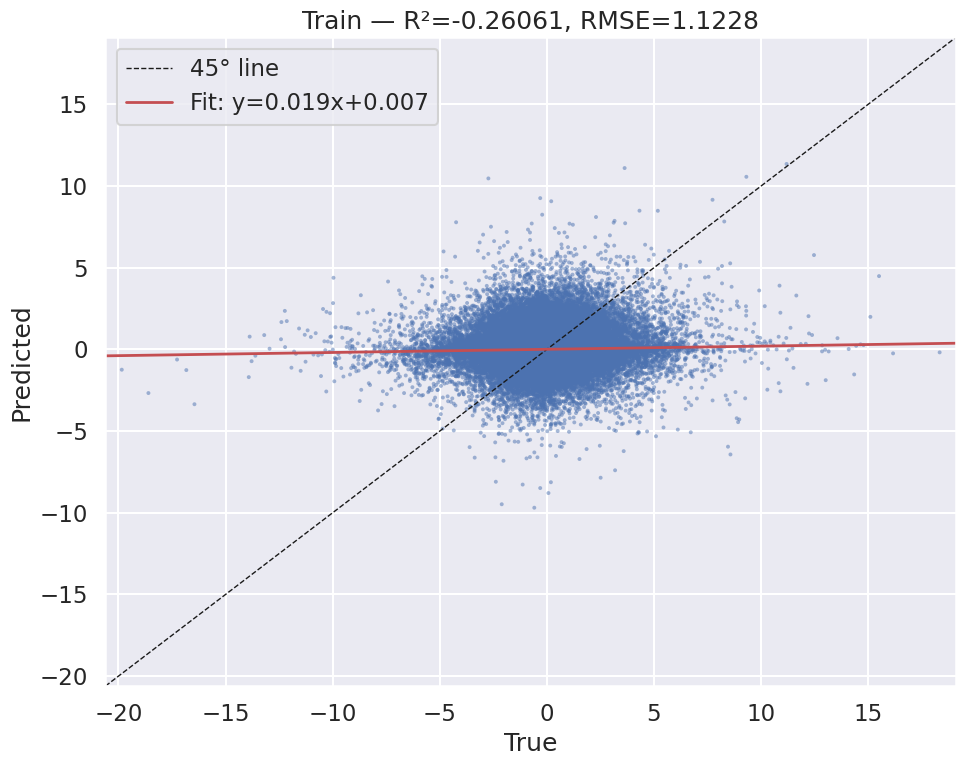

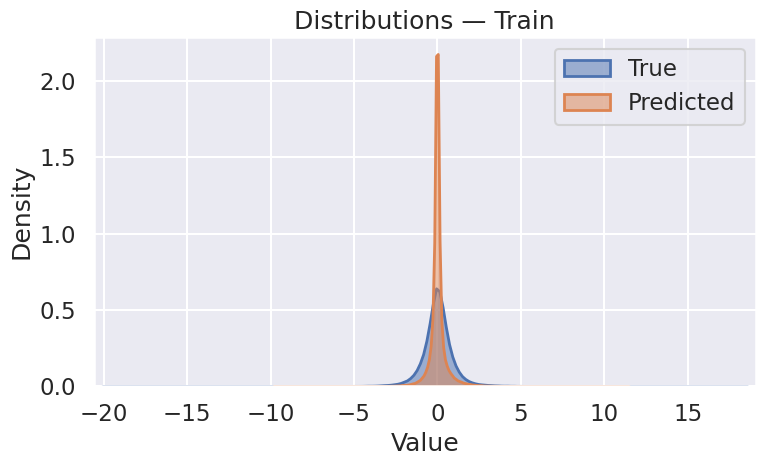

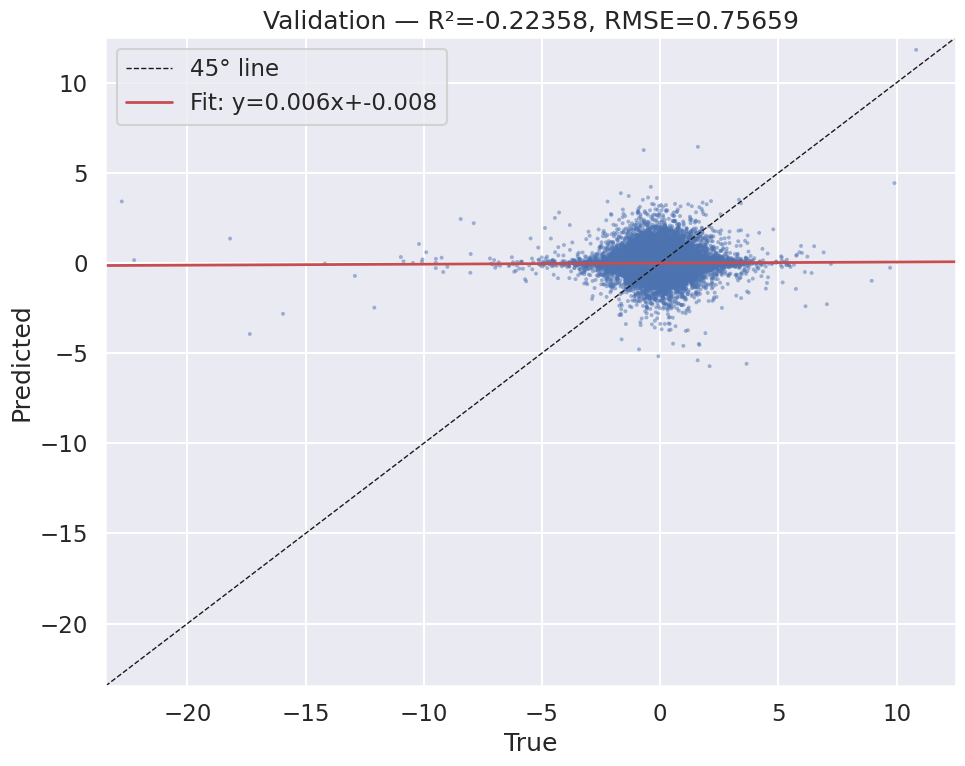

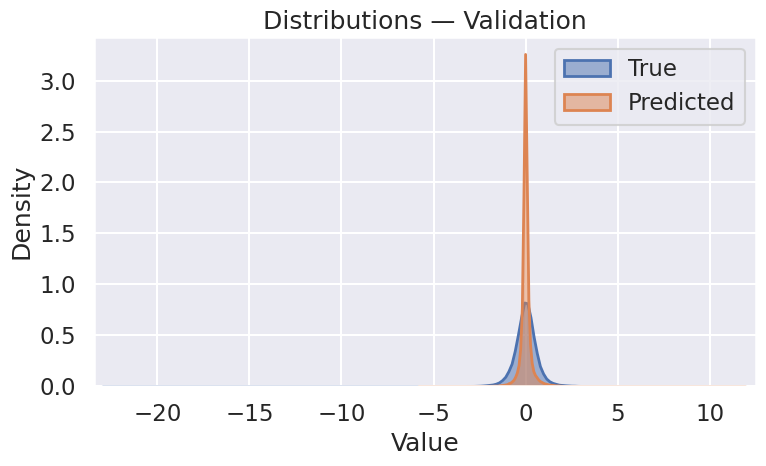

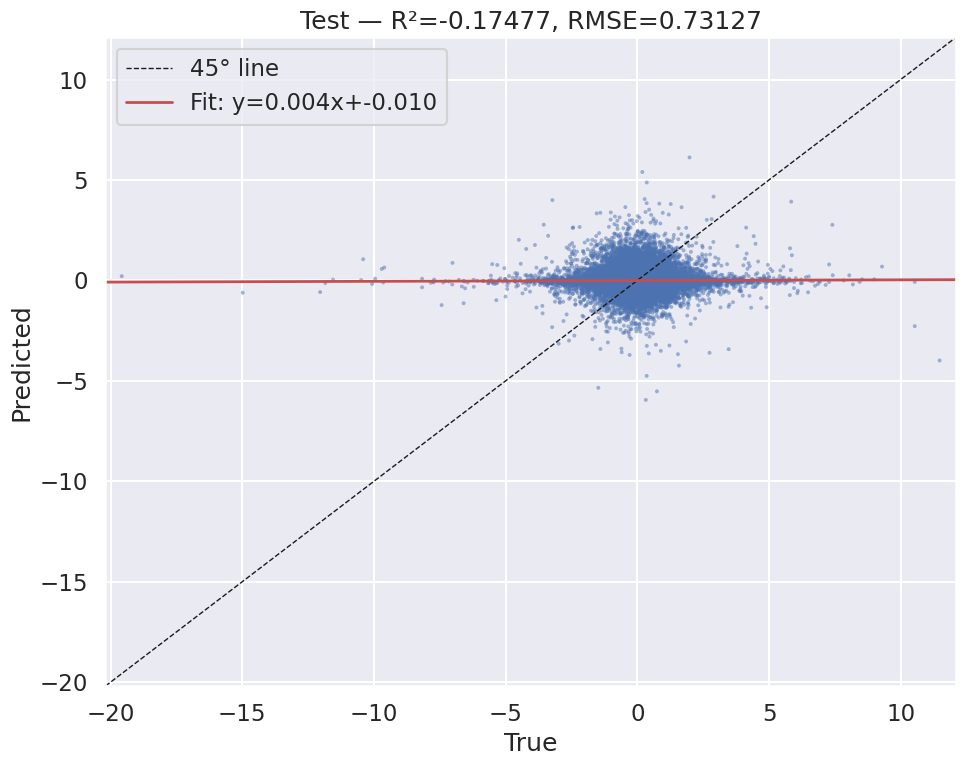

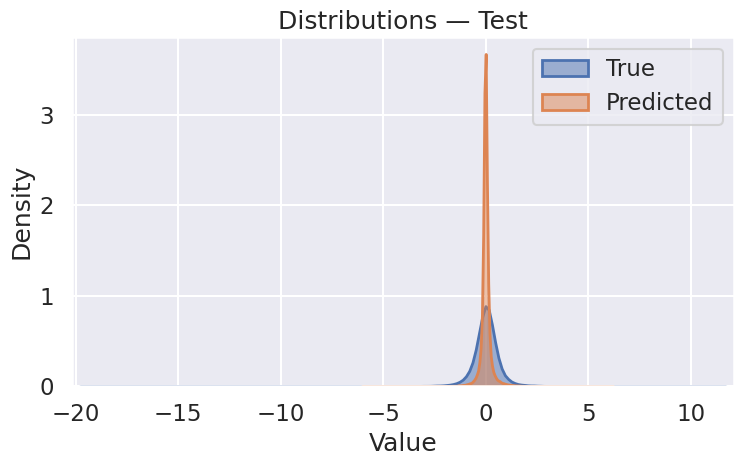

In [28]:
model, trdata, vdata, tedata = eval_and_plot_simple(cfg, input_shape, output_shape, checkpoint, data[fold])

In [29]:
y, yhat = trdata
np.mean(y - yhat)

np.float32(-0.006763381)

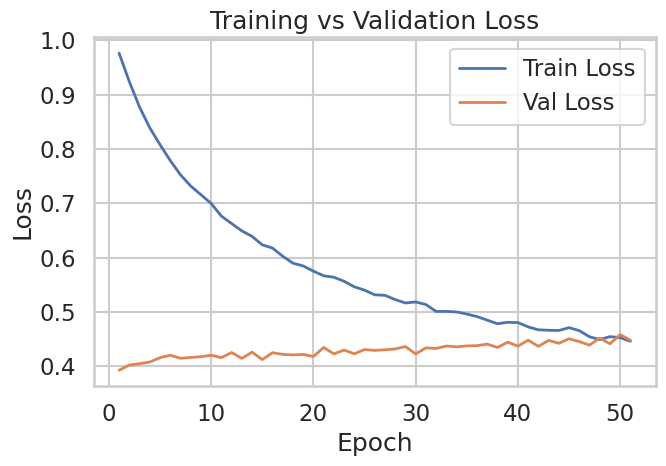

In [30]:
def plot_training_history(ckpt):
    """Plot train vs validation loss curves from the saved checkpoint."""
    history = ckpt.get("history", None)
    if not history:
        print("No training history found in checkpoint.")
        return

    # Convert list of dicts to separate arrays
    tr_losses = [h["tr_loss"] for h in history]
    val_losses = [h["val_loss"] for h in history]
    epochs = np.arange(1, len(tr_losses) + 1)

    sns.set_theme(style="whitegrid", context="talk")
    plt.figure(figsize=(7,5))
    plt.plot(epochs, tr_losses, label="Train Loss", lw=2)
    plt.plot(epochs, val_losses, label="Val Loss", lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_history(checkpoint)

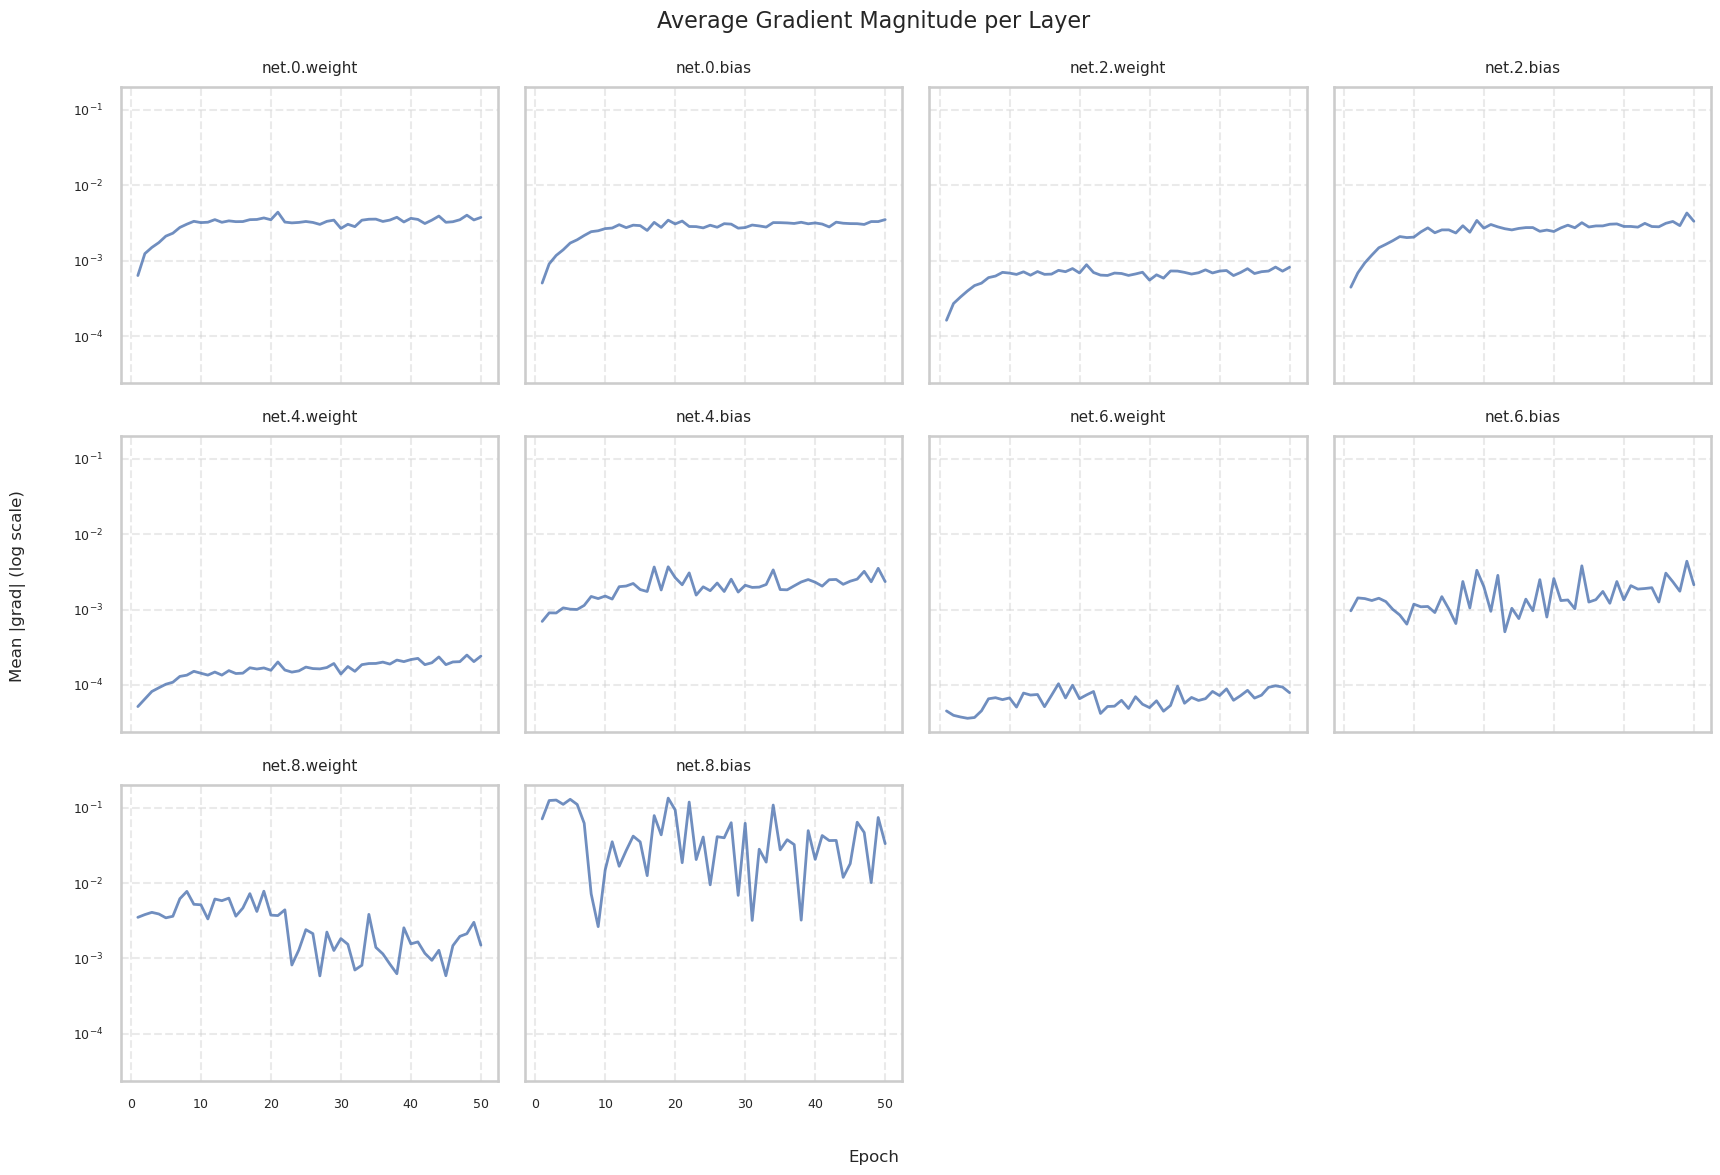

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_grad(ckpt):
    grad_history = ckpt.get("grad_history", [])
    if not grad_history:
        print("No grad_history found in checkpoint.")
        return

    df = pd.DataFrame(grad_history)
    if "epoch" not in df.columns:
        print("No 'epoch' column found in grad_history.")
        return

    df.set_index("epoch", inplace=True)
    
    # Clean column names for display (remove prefixes like _orig_mod.)
    df.columns = [c.replace("_orig_mod.", "") for c in df.columns]

    # --- grid setup ---
    n_cols = 4
    n_layers = len(df.columns)
    n_rows = math.ceil(n_layers / n_cols)

    # Increase figure size and adjust spacing
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        ax.plot(df.index, df[col], lw=2, alpha=0.8)
        ax.set_title(col, fontsize=11, pad=10)
        ax.set_yscale("log")
        ax.grid(True, linestyle="--", alpha=0.4)
        
        # Improve tick label formatting
        ax.tick_params(axis='both', which='major', labelsize=9)
        ax.tick_params(axis='both', which='minor', labelsize=7)
    
    # Hide empty tiles if #layers < grid size
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout with more padding
    plt.tight_layout(rect=[0.04, 0.04, 0.98, 0.96])  # [left, bottom, right, top]
    
    # Add titles with proper positioning
    fig.suptitle("Average Gradient Magnitude per Layer", fontsize=16, y=0.98)
    fig.text(0.5, 0.02, "Epoch", ha="center", fontsize=12)
    fig.text(0.02, 0.5, "Mean |grad| (log scale)", va="center", rotation="vertical", fontsize=12)
    
    plt.show()

plot_grad(checkpoint)

In [32]:
ckpt = checkpoint
grad_history = ckpt.get("grad_history", [])

df = pd.DataFrame(grad_history)

df.set_index("epoch", inplace=True)

# Clean column names for display (remove prefixes like _orig_mod.)
df.columns = [c.replace("_orig_mod.", "") for c in df.columns]
df


,net.0.weight,net.0.bias,net.2.weight,net.2.bias,net.4.weight,net.4.bias,net.6.weight,net.6.bias,net.8.weight,net.8.bias
epoch,,,,,,,,,,
1,0.000635,0.000505,0.000162,0.000445,0.000052,0.000697,0.000045,0.000963,0.003508,0.070866
2,0.001241,0.000907,0.000270,0.000690,0.000065,0.000905,0.000040,0.001427,0.003816,0.124225
3,0.001499,0.001174,0.000330,0.000936,0.000082,0.000901,0.000038,0.001398,0.004086,0.125995
4,0.001738,0.001394,0.000397,0.001186,0.000092,0.001053,0.000036,0.001318,0.003888,0.110544
5,0.002118,0.001713,0.000467,0.001483,0.000102,0.001012,0.000037,0.001414,0.003457,0.128943
6,0.002315,0.001894,0.000504,0.001648,0.000109,0.001004,0.000045,0.001276,0.003626,0.110226
7,0.002761,0.002158,0.000596,0.001843,0.000130,0.001136,0.000066,0.001005,0.006193,0.062131
8,0.003050,0.002425,0.000626,0.002089,0.000135,0.001492,0.000068,0.000846,0.007749,0.007182
9,0.003328,0.002494,0.000701,0.002026,0.000152,0.001398,0.000064,0.000641,0.005223,0.002643
